##EDA on Global Terrorism -Task by Sparks Foundation
#Done by :Tithi Hunka

#1) Objective:
Terrorism is The calculated use of unlawful violence or threat of unlawful violence to inculcate fear; intended to coerce or to intimidate governments or societies in the pursuit of goals that are generally political, religious, or ideological.


*   As a security/defence Analyst find out the hot zone of terrorism and derive some security issues.
*   Perform Analyis on hostorical data available on terrorism and derive the insights from it also giving some suggestions so that the countries can control the harms from terrorism.



#2) Data Description:
*   The dataset contains the data of approximatly 1,80,000 terrorist attacks happend in all around the world.
*   Dataset contains data of terrorism from 1970 to 2017.
*   Include systomatic data on domestic as well as international terrorist incidents that have occoured during specific time period.





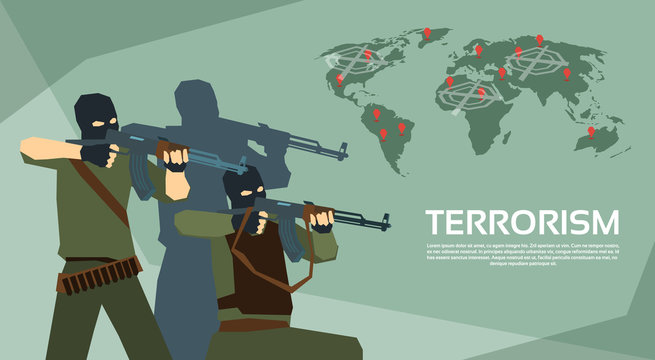

#3)Installation and importing liberaries:

In [1]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data
!pip install -q --upgrade pandas-profiling


     |████████████████████████████████| 69 kB 5.1 MB/s 
     |████████████████████████████████| 262 kB 7.1 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 102 kB 12.8 MB/s 
     |████████████████████████████████| 4.7 MB 45.8 MB/s 
     |████████████████████████████████| 596 kB 26.4 MB/s 
     |████████████████████████████████| 690 kB 51.5 MB/s 
     |████████████████████████████████| 812 kB 42.0 MB/s 
     |████████████████████████████████| 38.1 MB 18.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")  

#4) Data Acqusition

In [3]:
%matplotlib inline
#fetching file from drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
#Authentication for google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
link = 'https://drive.google.com/file/d/1MLzZA7_pyg-TRDhnvafOcq920--7uc5J/view?usp=sharing'

In [6]:
fluff, id = link.split('=')
file1 = drive.CreateFile({'id': '1MLzZA7_pyg-TRDhnvafOcq920--7uc5J'})
file1.GetContentFile('data.csv')

In [7]:
#Reading CSV file from Drive
import pandas as pd
data = pd.read_csv('data.csv',encoding = "ISO-8859-1")
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.45679,-69.95116,1.00000,0,NaN,NaN,1,1,1,0.00000,NaN,NaN,0.00000,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.00000,Named Civilian,NaN,Julio Guzman,58.00000,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,0.00000,NaN,NaN,0,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.37189,-99.08662,1.00000,0,NaN,NaN,1,1,1,0.00000,NaN,NaN,0.00000,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.00000,"Diplomatic Personnel (outside of embassy, consulate)",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.00000,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,0,7.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,0.00000,NaN,NaN,0,NaN,NaN,NaN,NaN,1.00000,1.00000,0.00000,NaN,NaN,NaN,Mexico,1.00000,800000.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.47860,120.59974,4.00000,0,NaN,NaN,1,1,1,0.00000,NaN,NaN,0.00000,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.00000,Radio Journalist/Staff/Facility,Voice of America,Employee,217.00000,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,0.00000,NaN,NaN,0,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.99749,23.76273,1.00000,0,NaN,NaN,1,1,1,0.00000,NaN,NaN,0.00000,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.00000,Embassy/Consulate,NaN,U.S. Embassy,217.00000,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,N

#5)Data information andn shape:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [9]:
data.shape

(181691, 135)

#5)Data Preparation and cleaning:

In [10]:
data.isnull().sum() #Checking Null value counts

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [11]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,181691.00000,181691.00000,181691.00000,181691.00000,181691.00000,181691.00000,181691.00000,177135.00000,177134.00000,181685.00000,181691.00000,181691.00000,181691.00000,181691.00000,181690.00000,29011.00000,181690.00000,181691.00000,181691.00000,181691.00000,6314.00000,428.00000,181691.00000,171318.00000,180132.00000,11144.00000,10685.00000,10828.00000,1176.00000,1097.00000,1147.00000,181311.00000,1955.00000,320.00000,181691.00000,110576.00000,112202.00000,115571.00000,19083.00000,1890.00000,616.00000,318.00000,133.00000,4839.00000,181691.00000,160923.00000,13127.00000,11542.00000,1863.00000,1693.00000,73.00000,70.00000,171378.00000,117245.00000,114733.00000,165380.00000,116989.00000,112548.00000,181691.00000,64065.00000,38989.00000,181513.00000,13572.00000,13517.00000,4063.00000,8124.00000,77381.00000,1350.00000,563.00000,774.00000,552.00000,10991.00000,10400.00000,181691.00000,181691.00000,181691.00000,181691.00000
mean,200270523949.24570,2002.63900,6.46728,15.50564,0.04535,131.96850,7.16094,23.49834,-458.69565,1.45145,0.06830,0.98853,0.99309,0.87567,-0.52317,1.29292,0.13777,0.88960,0.03651,3.24755,3.71951,5.24533,8.43972,46.97147,127.68644,10.24722,55.31165,131.17944,10.02126,55.54877,144.56495,0.08144,0.26547,0.19375,0.00295,-65.36115,-1.51773,0.04967,7.02285,0.24762,7.17695,0.41195,6.72932,-6.29634,6.44733,11.11716,6.81252,10.75403,6.91143,11.64324,6.24658,10.84286,2.40327,0.04598,0.50806,3.16767,0.03894,0.10716,-0.54456,3.29540,208811.86873,0.05905,4.53323,-0.35400,-46.79393,-32.51637,-0.14581,3172529.88718,578486.53046,717943.70149,240.37862,4.62924,-29.01827,-4.54373,-4.46440,0.09001,-3.94595
std,1325957057.16345,13.25943,3.38830,8.81404,0.20806,112.41454,2.93341,18.56924,204778.98861,0.99543,0.28455,0.10648,0.08282,0.32996,2.45582,0.70373,0.34466,0.31339,0.18755,1.91577,2.27202,2.24664,6.65384,30.95336,89.29912,5.70908,25.64031,125.95148,5.72345,26.28896,163.29929,0.27351,0.44170,0.39585,0.05423,216.53663,12.83035,1.09320,2.47685,0.97402,2.78373,0.49296,2.90800,4.23462,2.17343,6.49561,2.27708,7.59457,2.17796,8.49317,1.50721,8.19267,11.54574,5.68185,4.19994,35.94939,3.05736,1.48888,3.12289,0.48691,15524630.31143,0.46124,202.31639,6.83564,82.80041,121.20921,1.20786,30211571.27027,7077923.89059,10143919.92665,2940.96729,2.03536,65.72012,4.54355,4.63715,0.56846,4.69132
min,197000000001.00000,1970.00000,0.00000,0.00000,0.00000,4.00000,1.00000,-53.15461,-86185896.00000,1.00000,-9.00000,0.00000,0.00000,0.00000,-9.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,4.00000,1.00000,1.00000,4.00000,1.00000,1.00000,4.00000,0.00000,0.00000,0.00000,0.00000,-99.00000,-99.00000,-9.00000,1.00000,-9.00000,1.00000,0.00000,1.00000,-9.00000,1.00000,1.00000,1.00000,1.00000,2.00000,1.00000,5.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-9.00000,1.00000,-99.00000,-9.00000,-99.00000,-99.00000,-99.00000,-99.00000,-9.00000,-99.00000,-99.00000,-99.00000,-99.00000,1.00000,-99.00000,-9.00000,-9.00000,-9.00000,-9.00000
25%,199102060003.50000,1991.00000,4.00000,8.00000,0.00000,78.00000,5.00000,11.51005,4.54564,1.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,2.00000,2.00000,2.00000,3.00000,22.00000,83.00000,4.00000,34.00000,92.00000,3.00000,33.000

In [12]:
print(data.duplicated().sum())#Checking for duplicates

0


In [13]:
data.rename(columns={'eventid' : 'Eventid','iyear': 'Year','imonth':'Month','iday': 'Day','country_txt': 'Country','region_txt': 'Region','city':'City','latitude':'Latitude',
                     'longitude':'Longitude','attacktype1_txt': 'Attack_Type','targtype1_txt': 'Target_Type','targsubtype1_txt':'Target_Subtype','target1':'Target','gname':'Group_Name',
                     'weaptype1_txt':'Wepon_Type','weapsubtype1_txt':'Weapon_SubType','nkill':'Killed','nwound':'Wounded','property':'Property','summary':'Summary','ransom':'Ransom',
                     'ransomamt': 'Ransom_Amount','motive':'Motive'
                     },inplace=True)

In [14]:
data_intermediate=data[['Eventid','Year','Month','Day','Country','Region','City','Latitude','Longitude','Attack_Type','Target_Type','Target_Subtype','Target','Group_Name',
           'Wepon_Type','Weapon_SubType','Killed','Wounded','Property','Summary','Ransom','Ransom_Amount','Motive']]
data_intermediate.head(2)          

,Eventid,Year,Month,Day,Country,Region,City,Latitude,Longitude,Attack_Type,Target_Type,Target_Subtype,Target,Group_Name,Wepon_Type,Weapon_SubType,Killed,Wounded,Property,Summary,Ransom,Ransom_Amount,Motive
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.45679,-69.95116,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,Unknown,NaN,1.00000,0.00000,0,NaN,0.00000,NaN,NaN
1,197000000002,1970,0,0,Mexico,North America,Mexico city,19.37189,-99.08662,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, consulate)","Nadine Chaval, daughter",23rd of September Communist League,Unknown,NaN,0.00000,0.00000,0,NaN,1.00000,800000.00000,NaN


In [15]:
data_final=data_intermediate
data_final.isna().sum()

Eventid                0
Year                   0
Month                  0
Day                    0
Country                0
Region                 0
City                 434
Latitude            4556
Longitude           4557
Attack_Type            0
Target_Type            0
Target_Subtype     10373
Target               636
Group_Name             0
Wepon_Type             0
Weapon_SubType     20768
Killed             10313
Wounded            16311
Property               0
Summary            66129
Ransom            104310
Ransom_Amount     180341
Motive            131130
dtype: int64

#Data Imputations

In [16]:
data_final['Ransom'] = data_final['Ransom'].fillna(0)
data_final['Ransom_Amount'] = data_final['Ransom_Amount'].fillna(0)
data_final['Killed'] = data_final['Killed'].fillna(0)
data_final['Wounded'] = data_final['Wounded'].fillna(0)
data_final['Motive'] = data_final['Wounded'].fillna('Unknown')
data_final['Target_Subtype'] = data_final['Target_Subtype'].fillna('Unknown')
data_final['Weapon_SubType'] = data_final['Weapon_SubType'].fillna('Unknown')
data_final['Summary'] = data_final['Summary'].fillna('Unknown')
data_final['Target'] = data_final['Target'].fillna('Unknown')



In [17]:
missing_latitudes=data_final[data_final['Latitude'].isnull()] #Subsetting dataframe that are having null values for latitude
missing_latitudes.head(10)


,Eventid,Year,Month,Day,Country,Region,City,Latitude,Longitude,Attack_Type,Target_Type,Target_Subtype,Target,Group_Name,Wepon_Type,Weapon_SubType,Killed,Wounded,Property,Summary,Ransom,Ransom_Amount,Motive
16,197001110001,1970,1,11,Ethiopia,Sub-Saharan Africa,Unknown,NaN,NaN,Unknown,Military,"Military Personnel (soldiers, troops, officers, forces)",Soldier,Eritrean Liberation Front,Unknown,Unknown,1.00000,0.00000,0,Unknown,0.00000,0.00000,0.00000
103,197003030001,1970,3,3,Spain,Western Europe,Unknown,NaN,NaN,Hostage Taking (Kidnapping),Government (General),Politician or Political Party Movement/Meeting/Rally,"Garrigues, permanent spanish delegaet to Unesco",1st of May Group,Unknown,Unknown,0.00000,0.00000,0,Unknown,1.00000,0.00000,0.00000
132,197003140001,1970,3,14,Ethiopia,Sub-Saharan Africa,Unknown,NaN,NaN,Hostage Taking (Kidnapping),Journalists & Media,Newspaper Journalist/Staff/Facility,Film crew,Eritrean Liberation Front,Unknown,Unknown,0.00000,0.00000,0,Unknown,1.00000,0.00000,0.00000
165,197004000001,1970,4,0,Ethiopia,Sub-Saharan Africa,Unknown,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, consulate)","Jack Fry, peace corps official",Eritrean Liberation Front,Unknown,Unknown,0.00000,0.00000,0,Unknown,0.00000,0.00000,0.00000
210,197004210001,1970,4,21,Philippines,Southeast Asia,Cauayan,NaN,NaN,Bombing/Explosion,Airports & Aircraft,Aircraft (not at an airport),Philippines Airlines Aircraft,Unknown,Explosives,Unknown Explosive Type,36.00000,0.00000,1,Unknown,0.00000,0.00000,0.00000
316,197006010001,1970,6,1,Argentina,South America,Unknown,NaN,NaN,Assassination,Government (General),"Government Personnel (excluding police, military)","Ex. President, Pedro Aramburu",Montoneros (Argentina),Firearms,Automatic or Semi-Automatic Rifle,1.00000,0.00000,0,Unknown,0.00000,0.00000,0.00000
406,197007110001,1970,7,11,Guatemala,Central America & Caribbean,Unknown,NaN,NaN,Hostage Taking (Kidnapping),Business,Unknown,businessman,Rebel Armed Forces of Guatemala (FAR),Unknown,Unknown,0.00000,0.00000,0,Unknown,0.00000,0.00000,0.00000
417,197007210001,1970,7,21,Bolivia,South America,Unknown,NaN,NaN,Hostage Taking (Kidnapping),Business,Mining,"Technicians for U.S. goldmining firm, south americans placers inc.",Ejercito de Liberacion Nacional (Bolivia),Unknown,Unknown,0.00000,0.00000,0,Unknown,1.00000,0.00000,0.00000
668,197101150001,1971,1,15,Zambia,Sub-Saharan Africa,Unknown,NaN,NaN,Hostage Taking (Kidnapping),Government (General),"Government Personnel (excluding police, military)",members,Revolutionary Committee of Mozambique (COREMO),Unknown,Unknown,1.00000,0.00000,0,Unknown,0.00000,0.00000,0.00000
676,197101210001,1971,1,21,Guatemala,Central America & Caribbean,Unknown,NaN,NaN,Armed Assault,Educational Institution,School/University/Educational Building,U.S. School,Unknown,Firearms,Automatic or Semi-Automatic Rifle,0.00000,0.00000,1,Unknown,0.00000,0.00000,0.00000


In [18]:
data_final['Casualties']=data_final['Killed']+data_final['Wounded']
data_final['Total_Ransom_Amount']=data_final['Ransom']*data_final['Ransom_Amount']
data_final.head()

,Eventid,Year,Month,Day,Country,Region,City,Latitude,Longitude,Attack_Type,Target_Type,Target_Subtype,Target,Group_Name,Wepon_Type,Weapon_SubType,Killed,Wounded,Property,Summary,Ransom,Ransom_Amount,Motive,Casualties,Total_Ransom_Amount
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.45679,-69.95116,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,Unknown,Unknown,1.00000,0.00000,0,Unknown,0.00000,0.00000,0.00000,1.00000,0.00000
1,197000000002,1970,0,0,Mexico,North America,Mexico city,19.37189,-99.08662,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, consulate)","Nadine Chaval, daughter",23rd of September Communist League,Unknown,Unknown,0.00000,0.00000,0,Unknown,1.00000,800000.00000,0.00000,0.00000,800000.00000
2,197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,15.47860,120.59974,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,Unknown,Unknown,1.00000,0.00000,0,Unknown,0.00000,0.00000,0.00000,1.00000,0.00000
3,197001000002,1970,1,0,Greece,Western Europe,Athens,37.99749,23.76273,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Unknown,Explosives,Unknown Explosive Type,0.00000,0.00000,1,Unknown,0.00000,0.00000,0.00000,0.00000,0.00000
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,33.58041,130.39636,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Unknown,Incendiary,Unknown,0.00000,0.00000,1,Unknown,0.00000,0.00000,0.00000,0.00000,0.00000


In [19]:
#Replacement of Cities according to Region
data_final.city = data_final.groupby('Region').City.apply(lambda x: x.fillna(x.mode()[0]))
data_final.City.isnull().sum()

434

In [20]:
data_final.isna().sum()

Eventid                   0
Year                      0
Month                     0
Day                       0
Country                   0
Region                    0
City                    434
Latitude               4556
Longitude              4557
Attack_Type               0
Target_Type               0
Target_Subtype            0
Target                    0
Group_Name                0
Wepon_Type                0
Weapon_SubType            0
Killed                    0
Wounded                   0
Property                  0
Summary                   0
Ransom                    0
Ransom_Amount             0
Motive                    0
Casualties                0
Total_Ransom_Amount       0
dtype: int64

In [21]:
data_final.to_csv('TerroristFile.csv')

#6)Basic Analysis:

In [22]:
print('Country with highest terrorist Attack:',data_final['Country'].value_counts().index[0])
print('Region with highest terrorist Attack:',data_final['Region'].value_counts().index[0])
print('Highest no of Wepons used in terrorist Attack are of type :',data_final['Wepon_Type'].value_counts().index[0])
print('Maximum no of people killed in attacks are: ', data_final['Killed'].max(),'that took place in', data_final.loc[data_final['Killed'].idxmax()].Country)

Country with highest terrorist Attack: Iraq
Region with highest terrorist Attack: Middle East & North Africa
Highest no of Wepons used in terrorist Attack are of type : Explosives
Maximum no of people killed in attacks are:  1570.0 that took place in Iraq


#EDA 1) Number of terrorist attacks per year

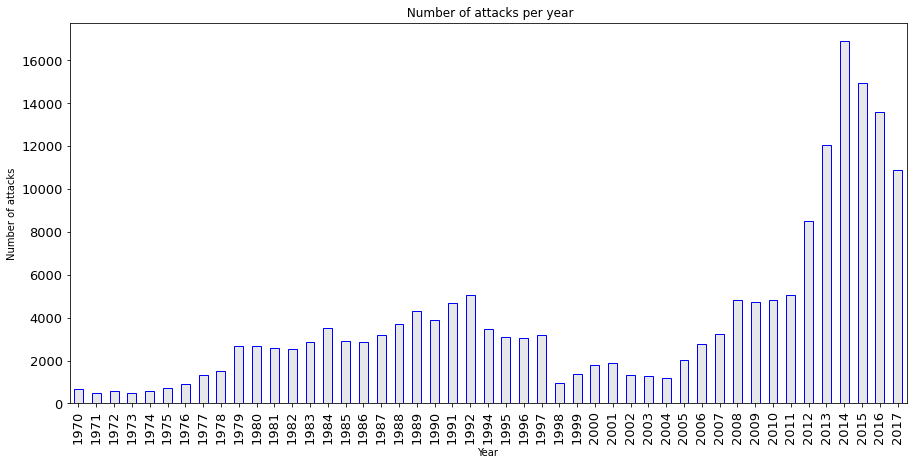

In [23]:
attack_per_year= data_final.groupby('Year')
attack_per_year['Eventid'].count().plot.bar(fontsize = 13,figsize = (15,7),color=(0.1,0.1,0.1,0.1), edgecolor='blue')
plt.xlabel("Year")
plt.ylabel("Number of attacks")
plt.title(" Number of attacks per year")
plt.show()

In [24]:
attack_per_year['Eventid'].count()

Year
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Eventid, dtype: int64

## Remark: 
Inspite of all security measures taken by countries, No of attacks are increacing year by year, And in 2014(16903)it was highest.

#EDA 2) Attacking methods used by terrorists

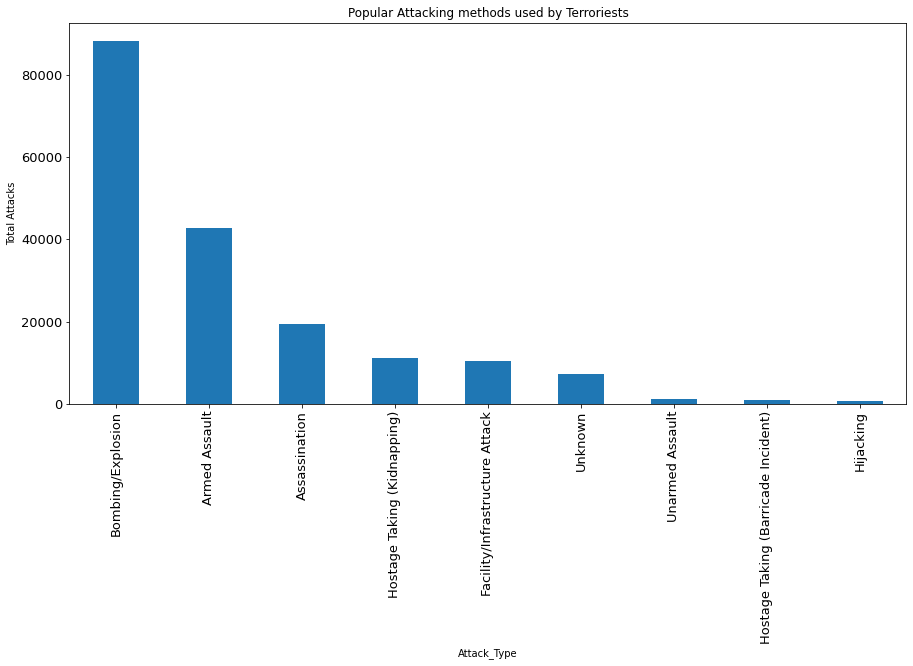

In [25]:
Attack_Type_plot=data_final.groupby('Attack_Type')
Attack_Type_plot['Eventid'].count().sort_values(ascending=False).plot.bar(fontsize = 13,figsize = (15,7),title = "Popular Attacking methods used by Terroriests")
plt.ylabel("Total Attacks")
plt.show()

In [26]:
Attack_Type_plot['Eventid'].count()

Attack_Type
Armed Assault                          42669
Assassination                          19312
Bombing/Explosion                      88255
Facility/Infrastructure Attack         10356
Hijacking                                659
Hostage Taking (Barricade Incident)      991
Hostage Taking (Kidnapping)            11158
Unarmed Assault                         1015
Unknown                                 7276
Name: Eventid, dtype: int64

##Remark: 
Most of the time attacking method is Bombing/Explosion used in 88255 attacks followed by Armed Assault used in 42669.

#EDA 3) Top Targets

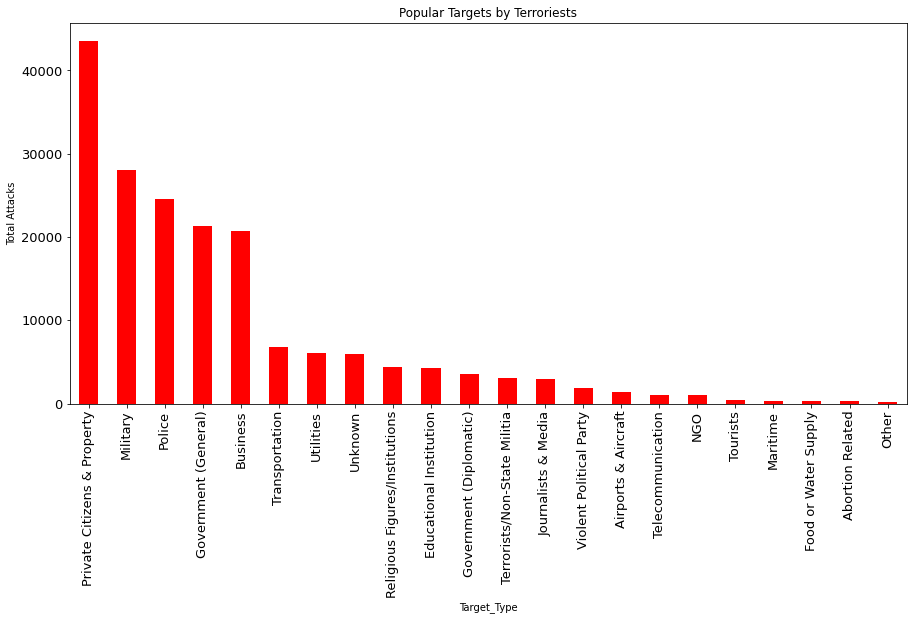

In [27]:
Top_Targets_plot=data_final.groupby('Target_Type')
Top_Targets_plot['Eventid'].count().sort_values(ascending=False).plot.bar(fontsize = 13,figsize = (15,7),title = "Popular Targets by Terroriests",color = 'Red')
plt.ylabel("Total Attacks")
plt.show()

In [28]:
Top_Targets_plot['Eventid'].count()

Target_Type
Abortion Related                    263
Airports & Aircraft                1343
Business                          20669
Educational Institution            4322
Food or Water Supply                317
Government (Diplomatic)            3573
Government (General)              21283
Journalists & Media                2948
Maritime                            351
Military                          27984
NGO                                 970
Other                               137
Police                            24506
Private Citizens & Property       43511
Religious Figures/Institutions     4440
Telecommunication                  1009
Terrorists/Non-State Militia       3039
Tourists                            440
Transportation                     6799
Unknown                            5898
Utilities                          6023
Violent Political Party            1866
Name: Eventid, dtype: int64

##Remark: 
Most of the time Targets is Private Citizens & Property(43511) followed by Military(27984).

#EDA 4) Most Targeted Regions

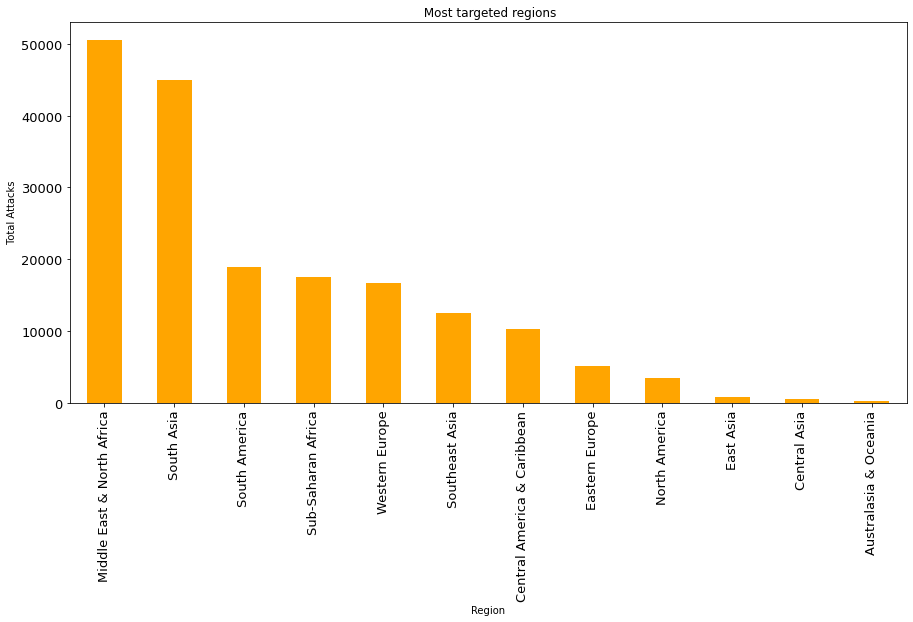

In [29]:
Targeted_Region_plot=data_final.groupby('Region')
Targeted_Region_plot['Eventid'].count().sort_values(ascending=False).plot.bar(fontsize = 13,figsize = (15,7),title = " Most targeted regions",color = 'Orange')
plt.ylabel(" Total Attacks")
plt.show()


##Remark: 
Most of the time Target Region is Middle East and North Africa followed by South Asia.

#EDA 5) Top 15 Targeted Countries

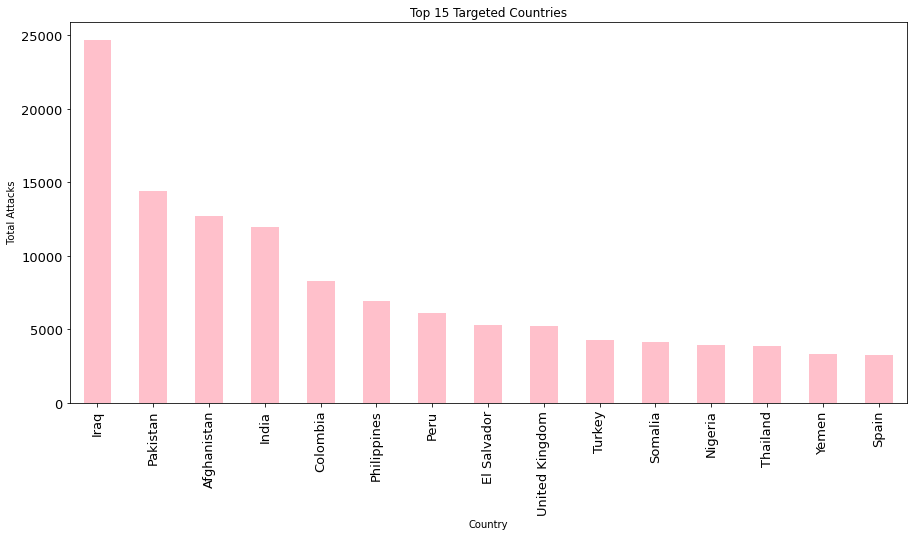

In [30]:
Targeted_Countries_plot=data_final.groupby('Country')
Targeted_Countries_plot['Eventid'].count().sort_values(ascending=False).nlargest(15).plot.bar(fontsize = 13,figsize = (15,7),title = "Top 15 Targeted Countries",color = 'Pink')
plt.ylabel(" Total Attacks")
plt.show()

In [31]:
Targeted_Countries_plot['Eventid'].count().nlargest(15)

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Eventid, dtype: int64

##Remark: 
15 Most Targeted Contries is shown in plot,Top most is Iraq(24636), followed by Pakistan(14368), India(11960) is in 4th number.

#EDA 6) Top 15 Active Terroriest groups

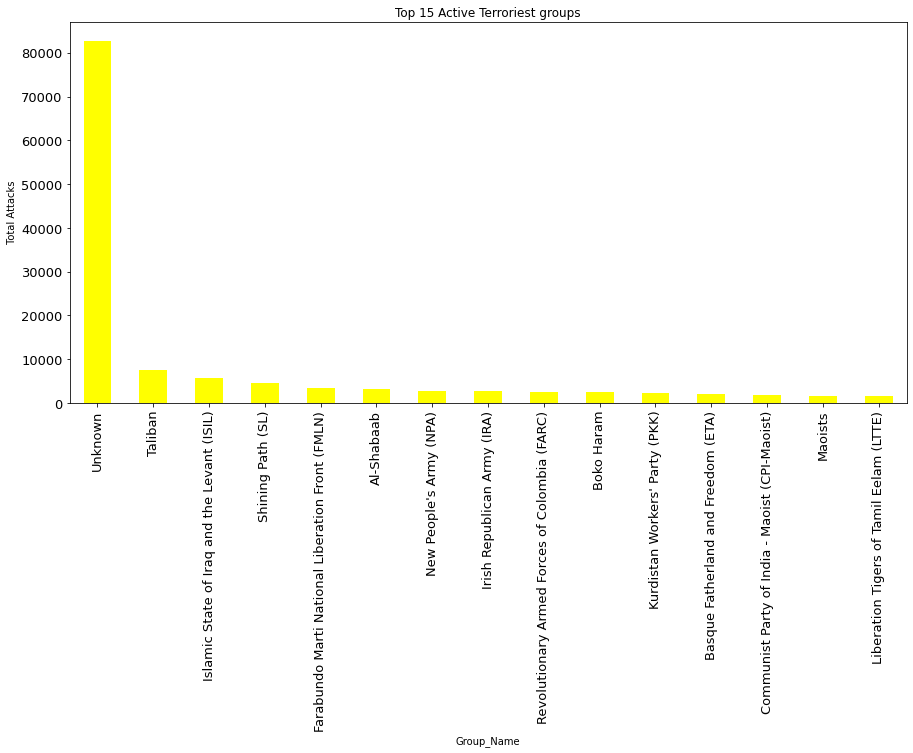

In [32]:
Group_Name_plot=data_final.groupby('Group_Name')
Group_Name_plot['Eventid'].count().sort_values(ascending=False).nlargest(15).plot.bar(fontsize = 13,figsize = (15,7),title = "Top 15 Active Terroriest groups",color = 'yellow')
plt.ylabel(" Total Attacks")
plt.show()

In [33]:
Group_Name_plot['Eventid'].count().nlargest(15)

Group_Name
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
Name: Eventid, dtype: int64

##Remark: 
15 Most Active Terroriest Groups is shown in plot,where most of group names are Unknown(82782) followed by Taliban(7478) and ISIL(5613).

#EDA 7) Top 15 Wepon used

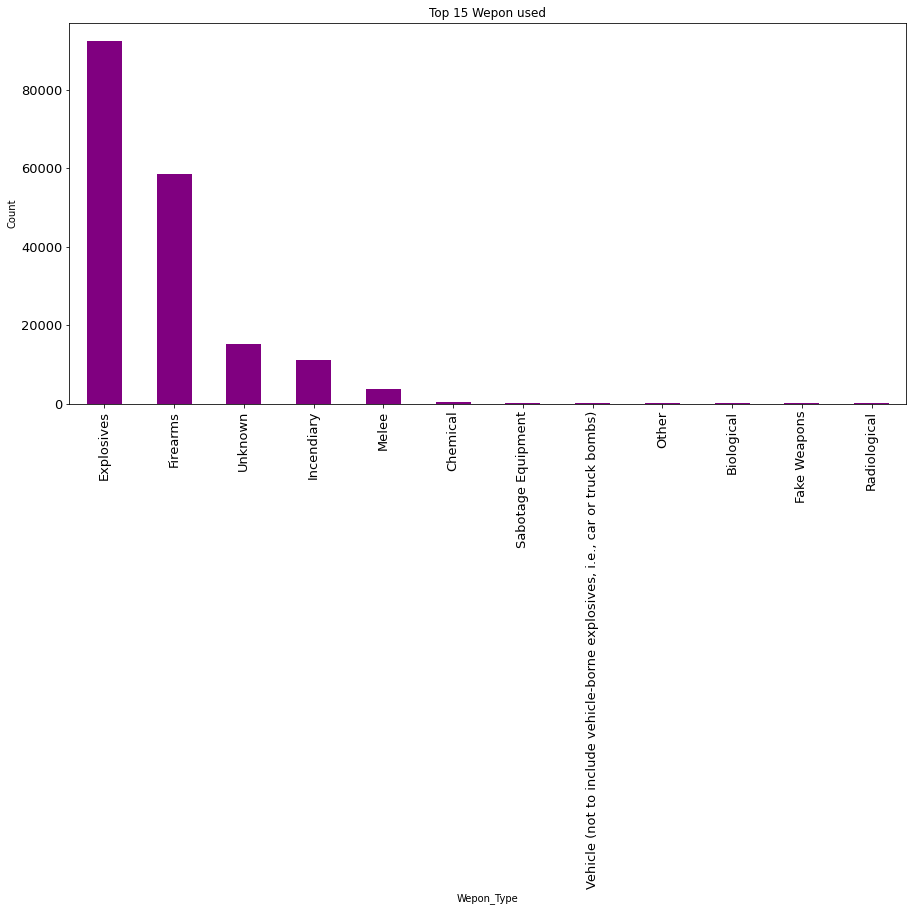

In [34]:
Wepon_Type_plot=data_final.groupby('Wepon_Type')
Wepon_Type_plot['Eventid'].count().sort_values(ascending=False).nlargest(15).plot.bar(fontsize = 13,figsize = (15,7),title = "Top 15 Wepon used",color = 'PURPLE')
plt.ylabel('Count')
plt.show()

In [35]:
Wepon_Type_plot['Eventid'].count()

Wepon_Type
Biological                                                                        35
Chemical                                                                         321
Explosives                                                                     92426
Fake Weapons                                                                      33
Firearms                                                                       58524
Incendiary                                                                     11135
Melee                                                                           3655
Other                                                                            114
Radiological                                                                      14
Sabotage Equipment                                                               141
Unknown                                                                        15157
Vehicle (not to include vehicle-borne explosives, i.e.

##Remark: 
15 Most Used Wepons are shown in plot,where most used wepon is Explosive (92426)followed by firearms(58524).

#EDA 8) Terrorist activity by region in each year

In [36]:
pd.crosstab(data_final.Year,data_final.Region)

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317
1975,0,9,0,12,0,44,159,55,4,7,12,438
1976,0,45,0,2,0,55,125,91,4,12,11,578
1977,0,24,0,4,2,211,149,119,2,8,29,771
1978,2,199,0,35,2,128,117,222,2,44,46,729


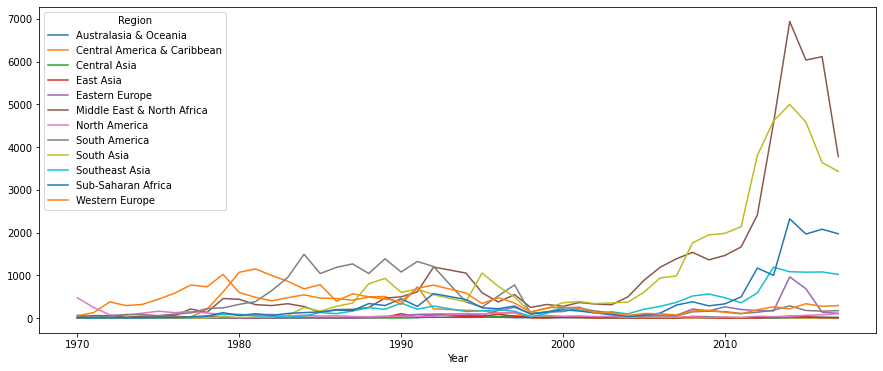

In [37]:
pd.crosstab(data_final.Year,data_final.Region).plot(kind='line',figsize=(15,6))

##Remark: 
After 2010 Terroriest activity has been drastically increased in middle east and north africa and also in south Asia.

#EDA 9) Region and cities wise casualties

<BarContainer object of 10 artists>

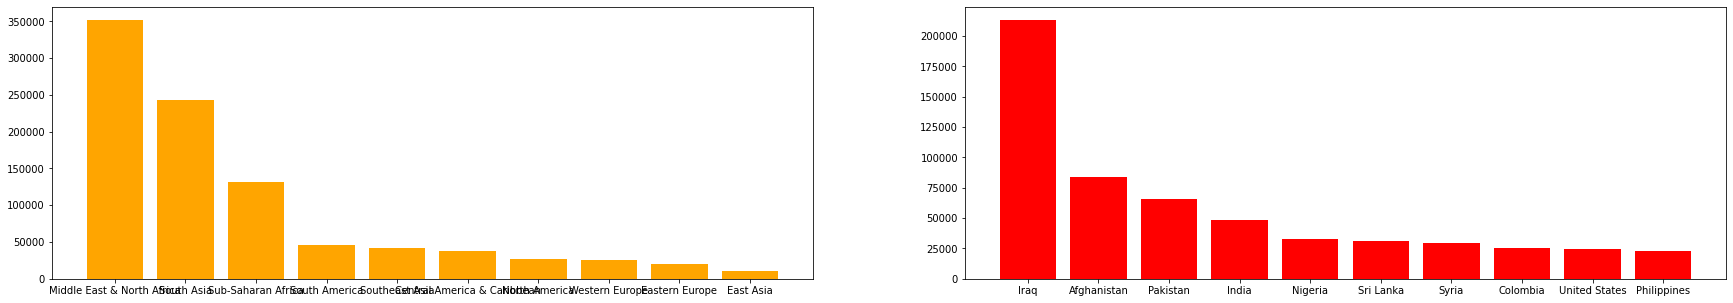

In [38]:
Regions_count=data_final.groupby('Region')
region_wise_casualties=Regions_count['Casualties'].sum().nlargest(10)
# define the figure container and the two plot axes
country_count=data_final.groupby('Country')
Country_wise_casualties=country_count['Casualties'].sum().nlargest(10)

# define the figure container and the two plot axes
fig = plt.figure(figsize=(30,5))
# add subplots to the figure (build a 1x2 grid and place chart in the first or second section)
ax1 = fig.add_subplot(1,2,1)
# define the figure container and the two plot axes
ax1 = fig.add_subplot(1,2,1)
ax1.bar(region_wise_casualties.index,region_wise_casualties,color='Orange')
ax2 = fig.add_subplot(1,2,2)
ax2.bar(Country_wise_casualties.index,Country_wise_casualties,color='red')


In [39]:
Regions_count['Casualties'].sum().nlargest(10)

Region
Middle East & North Africa    351950.00000
South Asia                    242679.00000
Sub-Saharan Africa            131243.00000
South America                  45553.00000
Southeast Asia                 41896.00000
Central America & Caribbean    37699.00000
North America                  26447.00000
Western Europe                 25026.00000
Eastern Europe                 19460.00000
East Asia                      10365.00000
Name: Casualties, dtype: float64

In [40]:
country_count['Casualties'].sum().nlargest(10)

Country
Iraq            213279.00000
Afghanistan      83661.00000
Pakistan         65860.00000
India            48321.00000
Nigeria          32921.00000
Sri Lanka        31091.00000
Syria            29338.00000
Colombia         25026.00000
United States    24473.00000
Philippines      22926.00000
Name: Casualties, dtype: float64

##Remark: 
most of the casulties are seen in middle east and north africa region((351950) and Country Iraq(213279).

#EDA 10) Year wise casulaties

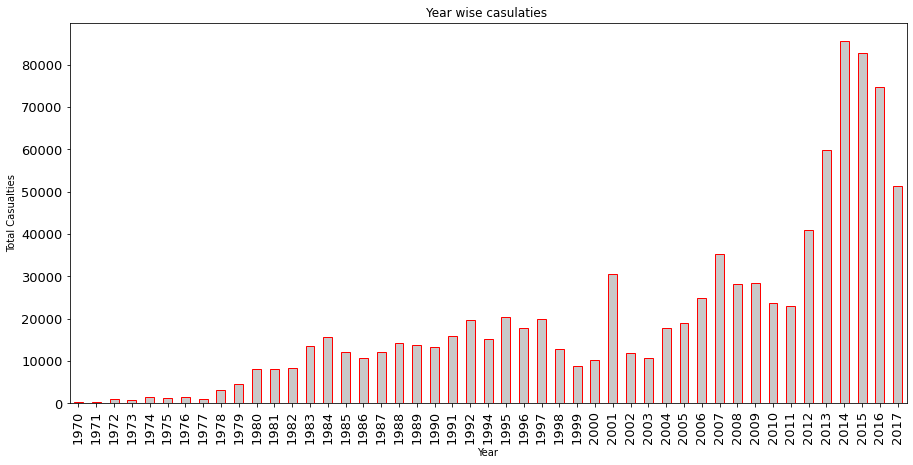

In [41]:
year_casualties= data_final.groupby('Year')
year_casualties['Casualties'].sum().plot.bar(fontsize = 13,figsize = (15,7),color=(0.3,0.3,0.3,0.3), edgecolor='Red')
plt.xlabel("Year")
plt.ylabel("Total Casualties")
plt.title("Year wise casulaties ")
plt.show()

In [42]:
year_casualties['Casualties'].sum()

Year
1970     386.00000
1971     255.00000
1972     975.00000
1973     865.00000
1974    1404.00000
1975    1234.00000
1976    1430.00000
1977     974.00000
1978    3059.00000
1979    4606.00000
1980    8045.00000
1981    8188.00000
1982    8478.00000
1983   13491.00000
1984   15741.00000
1985   12224.00000
1986   10790.00000
1987   12257.00000
1988   14168.00000
1989   13691.00000
1990   13276.00000
1991   16020.00000
1992   19657.00000
1994   15259.00000
1995   20395.00000
1996   17761.00000
1997   19996.00000
1998   12871.00000
1999    8734.00000
2000   10272.00000
2001   30503.00000
2002   11967.00000
2003   10701.00000
2004   17765.00000
2005   19115.00000
2006   24930.00000
2007   35348.00000
2008   28155.00000
2009   28411.00000
2010   23774.00000
2011   22905.00000
2012   40942.00000
2013   59961.00000
2014   85618.00000
2015   82896.00000
2016   74872.00000
2017   51372.00000
Name: Casualties, dtype: float64

##Remark: 
Highest casualty happend in year 2014(85618) followed by 2015(82896).

#EDA 11) Total properties distroyed each year in Attacks

In [43]:
data_final['Property']=data_final['Property'].abs()# As the property column washaving negative values, need to convert it into positive

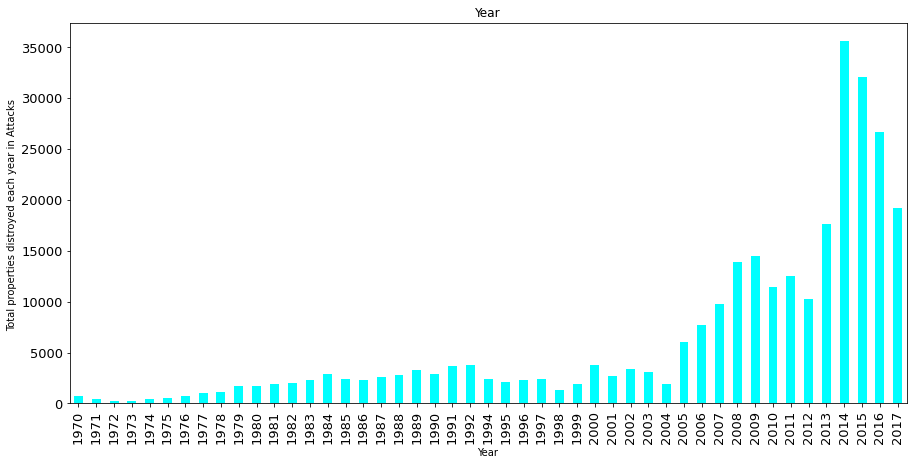

In [44]:
property_distroyed_eachyear= data_final.groupby('Year')
property_distroyed_eachyear['Property'].sum().plot.bar(fontsize = 13,figsize = (15,7),color='cyan')
plt.xlabel("Year")
plt.ylabel("Total properties distroyed each year in Attacks ")
plt.title("Year")
plt.show()

In [45]:
property_distroyed_eachyear['Property'].sum()

Year
1970      746
1971      462
1972      239
1973      259
1974      399
1975      502
1976      683
1977      983
1978     1102
1979     1733
1980     1712
1981     1876
1982     1974
1983     2268
1984     2894
1985     2399
1986     2304
1987     2585
1988     2798
1989     3245
1990     2864
1991     3720
1992     3780
1994     2362
1995     2081
1996     2339
1997     2370
1998     1344
1999     1886
2000     3806
2001     2741
2002     3416
2003     3040
2004     1938
2005     6067
2006     7684
2007     9737
2008    13912
2009    14484
2010    11410
2011    12517
2012    10212
2013    17612
2014    35610
2015    32040
2016    26656
2017    19216
Name: Property, dtype: int64

##Remark: 
Total properties destroyed in 2014 is highest in all of the world  i,e 35610

#EDA 11) Total properties distroyed in Attacks by region and country 

<BarContainer object of 10 artists>

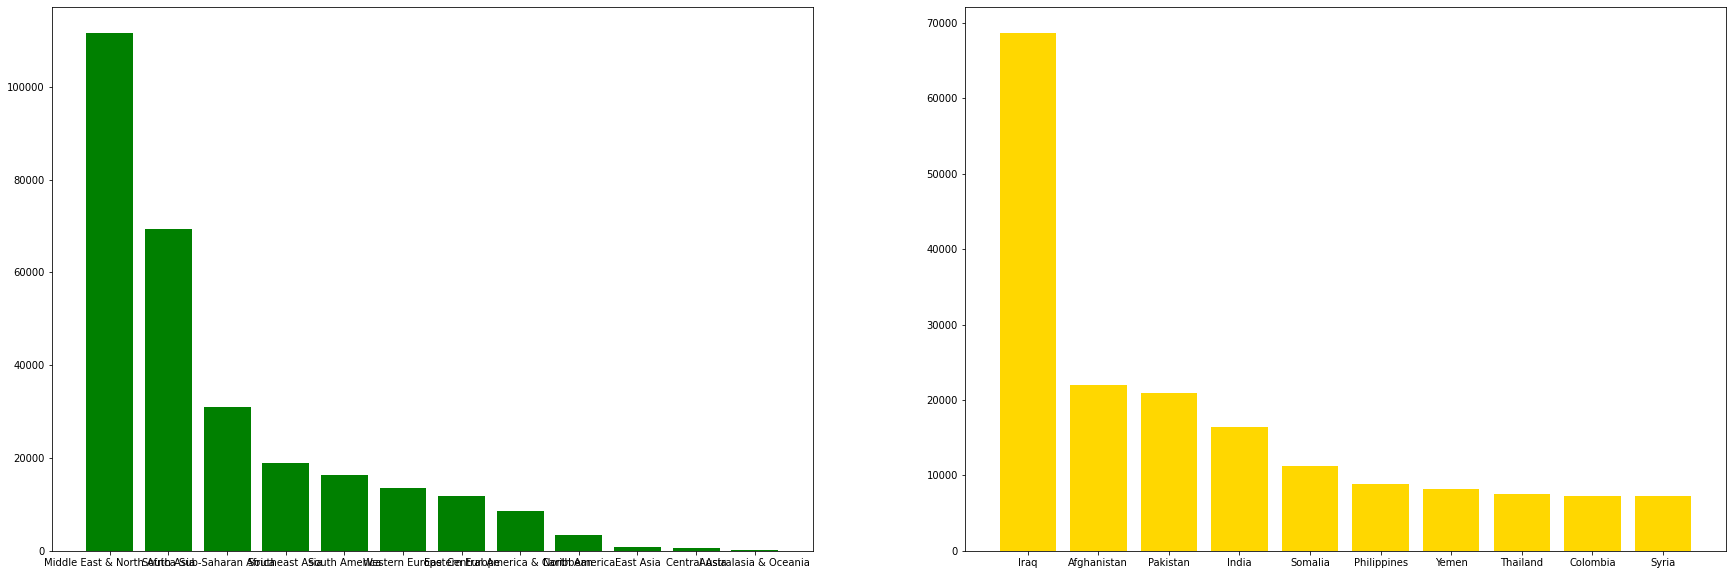

In [46]:
property_distroyed_eachyear_region= data_final.groupby('Region')
X=property_distroyed_eachyear_region['Property'].sum().nlargest(12)
property_distroyed_eachyear_Country= data_final.groupby('Country')
Y=property_distroyed_eachyear_Country['Property'].sum().nlargest(10)

# define the figure container and the two plot axes
fig = plt.figure(figsize=(30,10))
# add subplots to the figure (build a 1x2 grid and place chart in the first or second section)
ax1 = fig.add_subplot(1,2,1)
# define the figure container and the two plot axes
ax1 = fig.add_subplot(1,2,1)
ax1.bar(X.index,X,color='green')
ax2 = fig.add_subplot(1,2,2)
ax2.bar(Y.index,Y,color='gold')

In [47]:
property_distroyed_eachyear_region['Property'].sum()

Region
Australasia & Oceania             243
Central America & Caribbean      8486
Central Asia                      623
East Asia                         877
Eastern Europe                  11733
Middle East & North Africa     111549
North America                    3451
South America                   16247
South Asia                      69278
Southeast Asia                  18960
Sub-Saharan Africa              31047
Western Europe                  13513
Name: Property, dtype: int64

In [48]:
property_distroyed_eachyear_Country['Property'].sum().nlargest(10)

Country
Iraq           68639
Afghanistan    21997
Pakistan       20866
India          16365
Somalia        11290
Philippines     8852
Yemen           8147
Thailand        7496
Colombia        7266
Syria           7258
Name: Property, dtype: int64

##Remark: 
Total properties destroyed in Middle East & North Africa is 111549 due to terroriest attacks , Followed by South Asia(69278) also Total properties destroyed in iraq is 68639, Followed by Afghanistan(21997).


#In which month attacks are high

In [54]:
data_final['Month'].astype(int)
data_final['Month'].head(5)

0    7
1    0
2    1
3    1
4    1
Name: Month, dtype: int64

In [55]:
# Creating a dictionary of Month
"""list_of_months= {'0':'Unknown','1': 'January', '2': 'February', '3': 'March',
                              '4': 'April', '5': 'May', '6': 'June', '7': 'July',
                              '8': 'August', '9': 'September', '10': 'October',
                              '11': 'November', '12': 'December'}

# Applying a dictionary to the map method
data_final['Month_Name']= data_final['Month'].map(list_of_months)
data_final.head(5) """

list_of_months={0:'Unknown',1: 'January', 2: 'February', 3: 'March',
                            4: 'April', 5: 'May', 6: 'June', 7: 'July',
                            8: 'August', 9: 'September', 10: 'October',
                            11: 'November', 12: 'December'}
 
# Applying a dictionary to the map method
data_final['Month_Name']= data_final['Month'].map(list_of_months)
data_final.head(5)

,Eventid,Year,Month,Day,Country,Region,City,Latitude,Longitude,Attack_Type,Target_Type,Target_Subtype,Target,Group_Name,Wepon_Type,Weapon_SubType,Killed,Wounded,Property,Summary,Ransom,Ransom_Amount,Motive,Casualties,Total_Ransom_Amount,Month_Name
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.45679,-69.95116,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,Unknown,Unknown,1.00000,0.00000,0,Unknown,0.00000,0.00000,0.00000,1.00000,0.00000,July
1,197000000002,1970,0,0,Mexico,North America,Mexico city,19.37189,-99.08662,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, consulate)","Nadine Chaval, daughter",23rd of September Communist League,Unknown,Unknown,0.00000,0.00000,0,Unknown,1.00000,800000.00000,0.00000,0.00000,800000.00000,Unknown
2,197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,15.47860,120.59974,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,Unknown,Unknown,1.00000,0.00000,0,Unknown,0.00000,0.00000,0.00000,1.00000,0.00000,January
3,197001000002,1970,1,0,Greece,Western Europe,Athens,37.99749,23.76273,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Unknown,Explosives,Unknown Explosive Type,0.00000,0.00000,1,Unknown,0.00000,0.00000,0.00000,0.00000,0.00000,January
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,33.58041,130.39636,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Unknown,Incendiary,Unknown,0.00000,0.00000,1,Unknown,0.00000,0.00000,0.00000,0.00000,0.00000,January


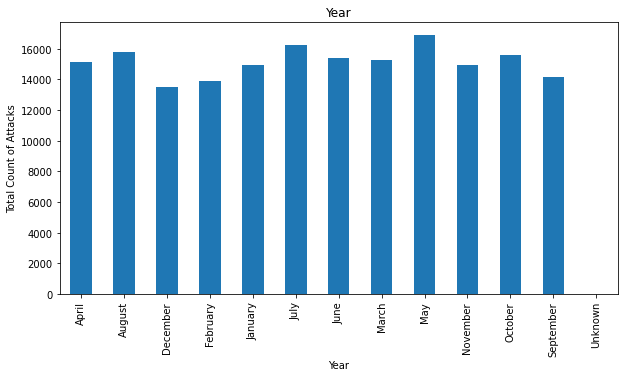

In [57]:
monthwise_attack= data_final.groupby('Month_Name')
monthwise_attack['Eventid'].count().plot(kind='bar',stacked=False,figsize=(10,5))
plt.xlabel("Year")
plt.ylabel("Total Count of Attacks")
plt.title("Year")
plt.show()

In [58]:
monthwise_attack['Eventid'].count()

Month_Name
April        15152
August       15800
December     13496
February     13879
January      14936
July         16268
June         15359
March        15257
May          16875
November     14906
October      15563
September    14180
Unknown         20
Name: Eventid, dtype: int64

##Remark: 
Highest attackes are done in month May i,e 16875

#corelation between multiple columns

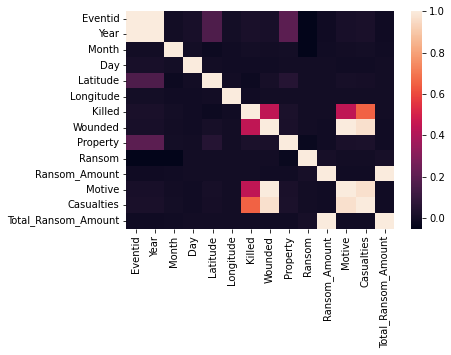

In [53]:
sns.heatmap(data_final.corr())

##Remark: 
The most corelated columns are killed, Wounded and Casualties.

#Conclusions:
1.   Inspite of all security measures taken by countries, No of attacks are increacing year by year, And in 2014(16903)it was highest.
2.   Most of the time attacking method is Bombing/Explosion used in 88255 attacks followed by Armed Assault used in 42669.
3.   Most of the time Targets is Private Citizens & Property(43511) followed by Military(27984).
4.  Most of the time Target Region is Middle East and North Africa followed by South Asia.
5. 15 Most Targeted Contries is shown in plot,Top most is Iraq(24636), followed by Pakistan(14368), India(11960) is in 4th number.
6.  15 Most Active Terroriest Groups is shown in plot,where most of group names are Unknown(82782) followed by Taliban(7478) and ISIL(5613).
7. 15 Most Used Wepons are shown in plot,where most used wepon is Explosive (92426)followed by firearms(58524).
8. After 2010 Terroriest activity has been drastically increased in middle east and north africa and also in south Asia.
9. Most of the casulties are seen in middle east and north africa region((351950) and Country Iraq(213279).
10. Highest casualty happend in year 2014(85618) followed by 2015(82896).
11. Total properties destroyed in Middle East & North Africa is 111549 due to terroriest attacks , Followed by South Asia(69278) also Total properties destroyed in iraq is 68639, Followed by Afghanistan(21997).
12. Total properties destroyed in 2014 is highest in all of the world  i,e 35610.
13. Highest attackes are done in month May i,e 16875.
14. The most corelated columns are killed, Wounded and Casualties.















